## EJERCICIO 5 - PRACTICA 3

**Se quiere utilizar los datos del df de autos para predecir el precio del auto a traves del tamaño del motor**

In [1]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR = '../Fuentes' # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR   = '../Datos/'  # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [3]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from ClassNeuronaLineal import NeuronaLineal



nombre_archivo = DATOS_DIR + 'automobile-simple.csv' # archivo de globos

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo)
print(df)

            make fuel-type num-of-doors   body-style  curb-weight  \
0    alfa-romero       gas          two  convertible         2548   
1    alfa-romero       gas          two  convertible         2548   
2    alfa-romero       gas          two    hatchback         2823   
3           audi       gas         four        sedan         2337   
4           audi       gas         four        sedan         2824   
..           ...       ...          ...          ...          ...   
200        volvo       gas         four        sedan         2952   
201        volvo       gas         four        sedan         3049   
202        volvo       gas         four        sedan         3012   
203        volvo    diesel         four        sedan         3217   
204        volvo       gas         four        sedan         3062   

     engine-size  horsepower  city-mpg  highway-mpg    price      volume  \
0            130       111.0        21           27  13495.0  528019.904   
1            130   

 ## Antes de comenzar con el entrenamiento, complete los datos faltantes del atributo “price” utilizando el valor promedio.

In [5]:
# veo cuantos datos faltantes hay y en que columnas
df.isnull().sum()

make            0
fuel-type       0
num-of-doors    2
body-style      0
curb-weight     0
engine-size     0
horsepower      2
city-mpg        0
highway-mpg     0
price           4
volume          0
eco-rating      0
dtype: int64

In [6]:
# El atributo num-of-doors NO ES NUMERICO, hay que numerizarlo para poder calcularle el promedio:
mapeo = {'num-of-doors': {'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6}}

df.replace(mapeo, inplace=True)
print(df)

            make fuel-type  num-of-doors   body-style  curb-weight  \
0    alfa-romero       gas           2.0  convertible         2548   
1    alfa-romero       gas           2.0  convertible         2548   
2    alfa-romero       gas           2.0    hatchback         2823   
3           audi       gas           4.0        sedan         2337   
4           audi       gas           4.0        sedan         2824   
..           ...       ...           ...          ...          ...   
200        volvo       gas           4.0        sedan         2952   
201        volvo       gas           4.0        sedan         3049   
202        volvo       gas           4.0        sedan         3012   
203        volvo    diesel           4.0        sedan         3217   
204        volvo       gas           4.0        sedan         3062   

     engine-size  horsepower  city-mpg  highway-mpg    price      volume  \
0            130       111.0        21           27  13495.0  528019.904   
1      

C:\Users\W10\AppData\Local\Temp\ipykernel_12392\3625252533.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(mapeo, inplace=True)


In [7]:
# para calcular los promedios de las columnas con datos faltantes, debo primero eliminar las filas con datos faltantes
#creo un dataframe auxiliar:
dfAUX = df

# elimino las filas con datos faltantes
dfAUX = dfAUX.dropna()

#verifico que no tenga datos faltantes
dfAUX.isnull().sum()


make            0
fuel-type       0
num-of-doors    0
body-style      0
curb-weight     0
engine-size     0
horsepower      0
city-mpg        0
highway-mpg     0
price           0
volume          0
eco-rating      0
dtype: int64

In [8]:
import numpy as np
# calculo el valor promedio de las columnas con datos faltantes (utilizando el dfAUX):
Average1 = np.mean(dfAUX['num-of-doors'])
Average2 = np.mean(dfAUX['horsepower'])
Average3 = np.mean(dfAUX['price'])

print('promedio columna num of doors :' , Average1)
print('promedio columna horsepower :' , Average2)
print('promedio columna price :' , Average3)

promedio columna num of doors : 3.1370558375634516
promedio columna horsepower : 103.60406091370558
promedio columna price : 13279.644670050762


In [9]:
# Reemplazo valores faltantes en el dataframe original

df['num-of-doors'] = df['num-of-doors'].fillna(Average1)
df['horsepower'] = df['horsepower'].fillna(Average2)
df['price'] = df['price'].fillna(Average3)

# verifico que ahora el dataframe original no tenga datos faltantes:
df.isnull().sum()

make            0
fuel-type       0
num-of-doors    0
body-style      0
curb-weight     0
engine-size     0
horsepower      0
city-mpg        0
highway-mpg     0
price           0
volume          0
eco-rating      0
dtype: int64

## Entrenamiento del combinador lineal

###  - Sin normalizar atributos

### - Normalizando ambos atributos linealmente

###  - Normalizando ambos atributos utilizando media y desvío

In [14]:
# Imprime matriz de correclacion --> indica la correlacion lineal entre los atributos engine-size y precio
corr = df[['engine-size', 'price']].corr()
print(corr) #correlacion lineal entre engine.size y price

# seleccion de atributos
X = np.array(df['engine-size']).reshape((-1,1))
T = np.array(df['price']).reshape((-1,1))

# normalizacion de datos de entrada
normalizarEntrada = 1

if normalizarEntrada==0:
    data_scaler = None
elif normalizarEntrada==1: #normalizacion estandar (lineal)
    data_scaler , targer_scaler= MinMaxScaler(), MinMaxScaler()
    X = data_scaler.fit_transform(X)  #fit calcula max y min para cada columna y lo aplica
    T = targer_scaler.fit_transform(T)
elif normalizarEntrada==2:  #normalizacion con media y desvio
    data_scaler, targer_scaler = StandardScaler(), StandardScaler()
    X = data_scaler.fit_transform(X) # normaliza engine-size
    T = targer_scaler.fit_transform(T) #normaliza price

             engine-size     price
engine-size     1.000000  0.861758
price           0.861758  1.000000


**Construccion del modelo y entrenamiento**

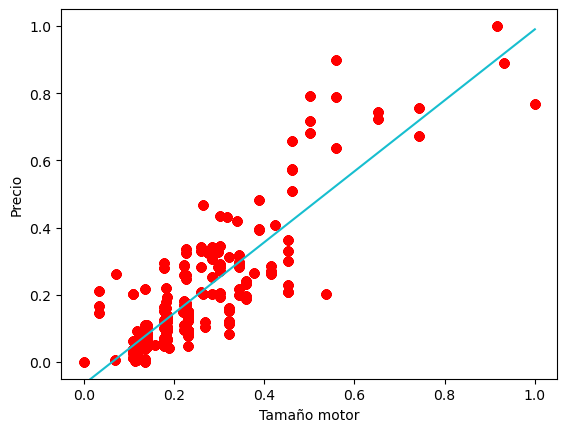

Errores:
  0 => 6.877843
  1 => 3.120959
  2 => 2.921874
  3 => 2.763261
  4 => 2.631816
  5 => 2.522810
  6 => 2.432397
  7 => 2.357392
  8 => 2.295157
  9 => 2.243508
 10 => 2.200633
 11 => 2.165033
 12 => 2.135466
 13 => 2.110902
 14 => 2.090487
 15 => 2.073515
 16 => 2.059399
 17 => 2.047653
 18 => 2.037876
 19 => 2.029733
 20 => 2.022947
 21 => 2.017289
 22 => 2.012569
 23 => 2.008627
 24 => 2.005333
 25 => 2.002579
 26 => 2.000274
 27 => 1.998343
 28 => 1.996724
 29 => 1.995364
 30 => 1.994221
 31 => 1.993259
 32 => 1.992449
 33 => 1.991765
 34 => 1.991187
 35 => 1.990698
 36 => 1.990284
 37 => 1.989932
 38 => 1.989632
 39 => 1.989377
 40 => 1.989159
 41 => 1.988972
 42 => 1.988812
 43 => 1.988675
 44 => 1.988556
 45 => 1.988454
 46 => 1.988366
 47 => 1.988289
 48 => 1.988223
 49 => 1.988165


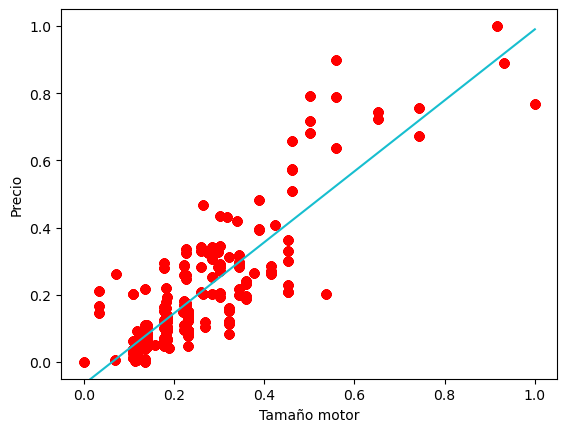

In [16]:
# entrena neurona lineal y grafica
modelo = NeuronaLineal(alpha=0.02, n_iter=50, cotaE=0.00001, draw=1, title=['Tamaño motor', 'Precio'])
#cotaE --> cota de error --> si la el modulo del error esta por debajo de cotaE, deja de iterar
modelo.fit(X, T)

# imprime errores de cada iteracion:
print('Errores:')
for i, err in enumerate(modelo.errors_):
    print('%3d => %f' % (i, err[0]))


**Prediccion de valores**

In [28]:
# invierte normalización para predecir
tamaño_motor = 130

entrada = np.array([tamaño_motor]).reshape((-1,1))

if data_scaler:
  entrada = data_scaler.transform(entrada)

prediccion = modelo.predict( entrada )

if targer_scaler:
  prediccion = targer_scaler.inverse_transform([prediccion]) #al dato de prediccion, le hago una transformacion inversa para que me de el dato real (precio)

# para la siguiente prueba tamaño_motor debe coincidir con valores de engin-size en el data_frame

autos_sel = df['engine-size']==tamaño_motor
valor_prom = df[autos_sel]['price'].mean()
valor_min = df[autos_sel]['price'].min()
valor_max = df[autos_sel]['price'].max()

print('Tamaño Motor:%.0f' % tamaño_motor)

print('Prediccion Precio: %.2f'% prediccion)

print('  Precio Promedio: %.2f'% valor_prom)
print('    Precio Mínimo: %.2f'% valor_min)
print('    Precio Máximo: %.2f'% valor_max)

df[autos_sel]

print(modelo.accuracy)

Tamaño Motor:130
Prediccion Precio: 13527.67
  Precio Promedio: 16841.25
    Precio Mínimo: 13495.00
    Precio Máximo: 18950.00


C:\Users\W10\AppData\Local\Temp\ipykernel_12392\3375392482.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Prediccion Precio: %.2f'% prediccion)


AttributeError: 'NeuronaLineal' object has no attribute 'accuracy'

## La mejor prediccion se hace con la normalizacion con media y desvio porque la prediccion (con size 130) es la que mas se parece al precio promedio calculado (con size 130) 